<a href="https://colab.research.google.com/github/cs167/notebook-4-niclacey/blob/main/Lacey_Notebook4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Nicole Lacey

# Notebook \#4

## Part 1:
**1.) Using scikit learn (sklearn)** You must run at least 6 variations of the algorithms and display their results using an appropriate regression metric (again, use the scikit-learn modules). I will be looking for the following to be included in your comparison:

*   k-Nearest-Neighbor with a **small value of k**
*   k-Nearest-Neighbor with a **large value of k**
*   **weighted k-Nearest-Neighbor** with a **small value of k** (the same one you used for the unweighted version)
*  **weighted k-Nearest-Neighbor** with a **large value of k** (the same one you used for the unweighted version) 
*   a **decision tree with default** parameter values
*   a **decision tree**, setting some kind of parameter that results in a **smaller tree**

You will need to use the documentation for sklearn for this Notebook. Here are some helpful links:
* [K Neighbors Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
* [Decision Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) 


In [1]:
# load in the data and necessary libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')
wine = pandas.read_csv('/content/drive/MyDrive/Datasets/winequality-white.csv') # change this to match your dataset directory

Mounted at /content/drive


In [2]:
#split the data
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
              'chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
target = "quality"
train_data, test_data, train_sln, test_sln = \
        train_test_split(wine[predictors], wine[target], test_size = 0.2, random_state=41)

In [3]:
# make sure it looks okay
print('train_data shape: ',train_data.shape)
print('test_data shape: ',test_data.shape)
print('train_sln shape: ',train_sln.shape)
print('test_sln shape: ',test_sln.shape)

print(train_data.head())
print(test_data.head())
print(train_sln.head())
print(test_sln.head())

train_data shape:  (1279, 11)
test_data shape:  (320, 11)
train_sln shape:  (1279,)
test_sln shape:  (320,)
      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
24              6.9              0.40         0.14  ...  3.43       0.63     9.70
728             6.4              0.57         0.02  ...  3.46       0.68     9.50
1366            7.3              0.74         0.08  ...  3.24       0.50     9.80
1413            9.9              0.57         0.25  ...  3.04       0.90    10.10
1456            6.0              0.54         0.06  ...  3.30       0.50    10.55

[5 rows x 11 columns]
      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
635             8.7              0.84         0.00  ...  3.27       0.55     9.70
581            12.3              0.50         0.49  ...  3.19       0.44     9.60
206            12.8              0.30         0.74  ...  3.20       0.77    10.80
547            10.6              0.31         0.4

In [4]:
# kNN with small k
# create our model
neigh = neighbors.KNeighborsRegressor(n_neighbors=4)

# fit (train) the model to the data
neigh.fit(train_data, train_sln)

# use the trained model to get predictions from our test_data
predictions = neigh.predict(test_data)

# use a metric to see how good our predictions are
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))


MSE:  0.555078125
r2:  0.1127622377622377


In [5]:
# kNN with large k
# create our model
neigh = neighbors.KNeighborsRegressor(n_neighbors=150)

# fit (train) the model to the data
neigh.fit(train_data, train_sln)

# use the trained model to get predictions from our test_data
predictions = neigh.predict(test_data)

# use a metric to see how good our predictions are
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))


MSE:  0.5744601388888888
r2:  0.08178199578199574


In [6]:
# w-knn with small k
# create our model
neigh = neighbors.KNeighborsRegressor(n_neighbors=4, weights = 'distance')

# fit (train) the model to the data
neigh.fit(train_data, train_sln)

# use the trained model to get predictions from our test_data
predictions = neigh.predict(test_data)

# use a metric to see how good our predictions are
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

MSE:  0.4814149489589378
r2:  0.23050557608960975


In [7]:
# w-knn with large k
# create our model
neigh = neighbors.KNeighborsRegressor(n_neighbors=150, weights = 'distance')

# fit (train) the model to the data
neigh.fit(train_data, train_sln)

# use the trained model to get predictions from our test_data
predictions = neigh.predict(test_data)

# use a metric to see how good our predictions are
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

MSE:  0.4227158929247682
r2:  0.32433024107929165


In [8]:
# decision tree with default paramters
decision = tree.DecisionTreeRegressor()
decision.fit(train_data, train_sln)
predictions = decision.predict(test_data)
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

MSE:  0.578125
r2:  0.0759240759240759


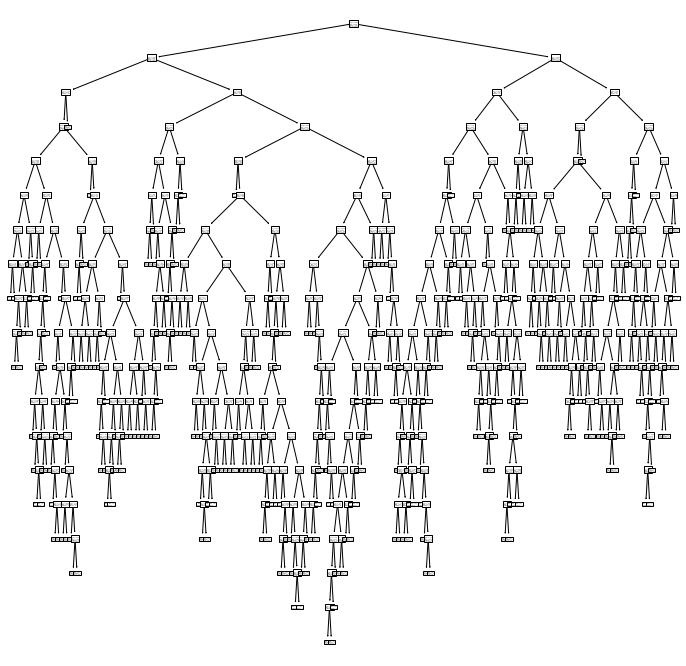

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12)) # Makes is to the graph isn't tiny
tree.plot_tree(decision); #if you remove the ;, you'll get more information about the tree

#this is a ginormous tree jesus christ

In [10]:
# decision tree with some kind of parameter that (hopefully) results in a smaller tree
decision = tree.DecisionTreeRegressor(criterion='mse', max_leaf_nodes= 7)
decision.fit(train_data, train_sln)
predictions = decision.predict(test_data)
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

#using max leaf nodes is kind of cheating to make this tree smaller. But it definitely works. 

MSE:  0.43012133803052166
r2:  0.31249336578538


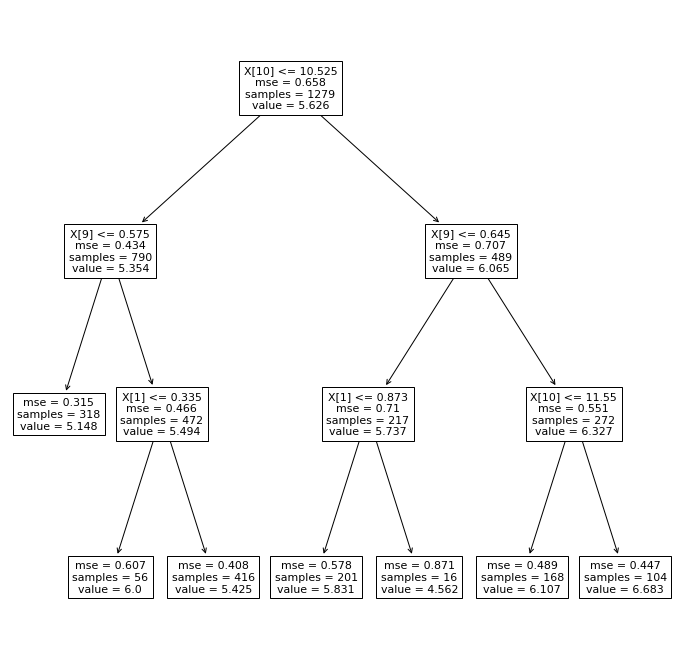

In [11]:
plt.figure(figsize=(12,12)) # Makes is to the graph isn't tiny
tree.plot_tree(decision);

## Part 2: kNN on Normalized data
**2.)** Normalize the data and run a k-Nearest-Neighbor algorithm on it. (use the StandardScalar from sklearn)

In [15]:
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

# run a knn
# using the nonweighted with small k 
neigh = neighbors.KNeighborsRegressor(n_neighbors=10)

# fit (train) the model to the data
neigh.fit(train_data_normalized, train_sln)

# use the trained model to get predictions from our test_data
predictions = neigh.predict(test_data_normalized)

# use a metric to see how good our predictions are
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))


MSE:  0.3825
r2:  0.38861138861138855


## Part 3:
**3.)**Use a Markup cell to answer the following questions:

- What algorithm performed better? kNN or Decision Trees? Why do you think this was the case?
- What effect did normalizing the data have on your results? Explain.

# What algorithm performed better?
The weighted kNNs performed the best, but the second decision tree had a pretty close MSE. I think it is because weighting the distance helps with this many variables. 
# What does normalizing do to the data?
Normalizing it reduced the MSE and helped the r^2. This happened because normalizing creates a common scale for all of the variables. This is better for estimating good values because it's easier for the program to tell exactly what the nearby points have in common. 